In [1]:

import pygame
import random
import os
import time
import numpy as np
import math
import torch
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)


pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
cuda:0


D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
global target_order
target_order = "supervised"
global temp_list
temp_list = []
Agent_number_n=4;
Alpha = 0.666;



In [3]:
global temp_list
temp_list = []
def appen(_x_list,y):
    global temp_list
    temp_list.append(_x_list)
    
def appen_train(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    
    training_data.append(temp_list)
    training_label.append(S)
    

def read_training_data():
    for i in range(100000):
        appen_train(sorted(np.random.rand(Agent_number_n), reverse=True));

training_data=[]
training_label=[]
S=1.0
read_training_data();

def appen_test(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    testing_data.append(temp_list)
    testing_label.append(S)
    

def read_testing_data():
#     devided=20
#     for i1 in range(devided+1):
#         for i2 in range(i1+1):
#             for i3 in range(i2+1):
#                 appen_test(i1/devided,i2/devided,i3/devided);
    for i in range(100000):
        appen_test(sorted(np.random.rand(Agent_number_n), reverse=True));
                            

testing_data=[]
testing_label=[]
S=1.0
read_testing_data();

training_data=np.array(training_data)
training_label=np.array(training_label)
testing_data=np.array(testing_data)
testing_label=np.array(testing_label)
print(training_data)
print(testing_data)
print(training_label)
print(testing_label)

[[[0.45409243 0.23782009 0.21612415]
  [0.67163979 0.23782009 0.21612415]
  [0.67163979 0.45409243 0.21612415]
  [0.67163979 0.45409243 0.23782009]]

 [[0.55052628 0.54073017 0.26145573]
  [0.77944052 0.54073017 0.26145573]
  [0.77944052 0.55052628 0.26145573]
  [0.77944052 0.55052628 0.54073017]]

 [[0.33454572 0.13641707 0.12626498]
  [0.88432058 0.13641707 0.12626498]
  [0.88432058 0.33454572 0.12626498]
  [0.88432058 0.33454572 0.13641707]]

 ...

 [[0.60435407 0.59011728 0.25729043]
  [0.92363324 0.59011728 0.25729043]
  [0.92363324 0.60435407 0.25729043]
  [0.92363324 0.60435407 0.59011728]]

 [[0.8010904  0.7030203  0.67118871]
  [0.96766095 0.7030203  0.67118871]
  [0.96766095 0.8010904  0.67118871]
  [0.96766095 0.8010904  0.7030203 ]]

 [[0.65082563 0.55036601 0.47750227]
  [0.75801109 0.55036601 0.47750227]
  [0.75801109 0.65082563 0.47750227]
  [0.75801109 0.65082563 0.55036601]]]
[[[0.65983028 0.36400532 0.35077864]
  [0.9509366  0.36400532 0.35077864]
  [0.9509366  0.6598

In [4]:
def h_3_star(a, b, t):
    return a - min(a, t) + b - min(b, t) + max(min(a, t)+min(b, t), 2*t/3) + 1/2 * max(min(a, t)+min(b, t), t) - 1/2 * max(max(min(a, t), min(b, t)), 2*t/3) - t/6


def f_function(a, b, z):
    if(z >= 1):
        return (a+b)/2 + z/3
    else:
        return z/3 + h_3_star(a, b, 1-z)/2

def h_function(input_list):
    #input_list = sorted(input_list)
    g_list = []
    for j1 in range(len(input_list) ):
        for j2 in range(len(input_list)):
            if(j1 != j2):
                a = input_list[j1]
                b = input_list[j2]
                z = sum(input_list)- a-b

                g_list.append( f_function(a, b, z) * (Agent_number_n-1))
    h = sum(g_list) * 3 /  (Agent_number_n) /  (Agent_number_n-1) /  (Agent_number_n - 2)
    return h
                
                
x_list = []
y_list = []
z_list = []
result_list = []
training_supervised_label=[]
for index in range(len(training_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list.append(training_data[index][i][0])
        y_list.append(training_data[index][i][1])
        h = h_function(training_data[index][i])
        z_list.append(float(h))
        h_list.append(float(h))
    training_supervised_label.append(h_list)
    result_list.append(sum(h_list)/training_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list))

3.374696361205909 2.999999999999999 0.37469636120590977


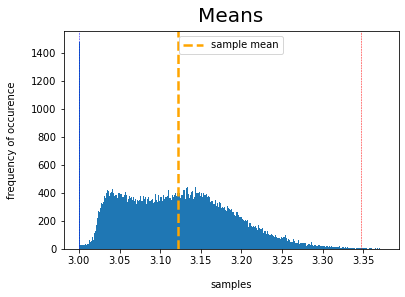

In [5]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.001)], linestyle='--', linewidth=0.5, label="0.1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.999)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [6]:
training_supervised_label=np.array(training_supervised_label)
print(training_supervised_label)

[[0.90803667 1.13407086 1.40441128 1.43559919]
 [1.44918949 1.68474283 1.69698796 2.01185985]
 [0.75       1.10213307 1.34979388 1.36248399]
 ...
 [1.56212779 1.86743872 1.88523471 2.22834152]
 [2.27838698 2.42413621 2.50994755 2.5378002 ]
 [1.84385717 1.93764444 2.02554661 2.08930238]]


In [7]:
if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)


cuda:0


In [8]:
def weight_init(m):
    if isinstance(m, torch.nn.Conv2d):
        torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)
    elif isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, mean=0.0,std =0.2)
        torch.nn.init.normal_(m.bias, mean=0.0,std =0.01)
    elif isinstance(m, torch.nn.Parameter):
        torch.nn.init.normal_(m, mean=0.0,std =0.1)
        

class Net(torch.nn.Module):
    def __init__(self):

        super(Net, self).__init__()
        
        self.input_dim = (Agent_number_n-1) 
        self.hidden_dim = 10
        self.output_dim = 1
        self.hidden_layer_count = 1
        
        
        self.layer0 = torch.nn.Parameter(torch.Tensor(self.input_dim, self.hidden_dim))
        self.bias0 = torch.nn.Parameter(torch.Tensor(self.hidden_dim))
        self.layer1 = torch.nn.Parameter(torch.Tensor(self.hidden_dim, self.hidden_dim))
        self.bias1 = torch.nn.Parameter(torch.Tensor(self.hidden_dim))
        self.layer2 = torch.nn.Parameter(torch.Tensor(self.hidden_dim, self.output_dim))
        self.bias2 = torch.nn.Parameter(torch.Tensor(self.output_dim))

    def calculate(self, value_list):
        #h0 = torch.cat([torch.tensor([torch.sum(value_list)]).cuda(),value_list])
        h0 = value_list
        h1 = torch.relu(torch.matmul(h0,self.layer0)-self.bias0) + self.bias0
        h2 = torch.relu(torch.matmul(h1,self.layer1)-self.bias1) + self.bias1
        h = torch.relu(torch.matmul(h2,self.layer2)+self.bias2) 
        
        return h

    def forward(self, input_list,input_label,label):
        global iteration,echo,target_order
        loss1 = 0
        loss2 = 0
        input_list = torch.from_numpy(
            np.array(input_list)).cuda().type(torch.float32)
        h_list = []

        for i in range(Agent_number_n):
            h = self.calculate(input_list[i])
            h_list.append(h)
        input_label = torch.from_numpy(
            np.array(input_label)).cuda().type(torch.float32)
        sum_h = torch.sum(torch.cat(h_list)).cuda()


        loss1 = torch.where((Agent_number_n-1)*input_label>sum_h,
                        torch.square(((Agent_number_n-1)*input_label-sum_h)),
                        torch.zeros(1).cuda()
                      )

        loss2 = torch.where((Agent_number_n-Alpha)*input_label<sum_h,
                        torch.square((sum_h-(Agent_number_n-Alpha)*input_label)),
                        torch.zeros(1).cuda()
                      )

        return loss1,loss2,h_list

In [9]:
random.seed(2000)
torch.manual_seed(256)
net  = Net()
net.apply(weight_init)

net = torch.load("save/Deep_learning_4")
net.to(dev)

Net()

In [10]:
#optimizer = opt.RMSprop(net.parameters(), lr=0.00001)
#optimizer = opt.SGD(net.parameters(), lr=0.00005)
optimizer = opt.Adam(net.parameters(), lr=0.0001)
#optimizer = opt.Adadelta(net.parameters(), lr=1.0)
batch_size = 64
echo = 10

In [11]:
for iteration in range(int(echo)):
    # offender_types = []
    # defender_types = []
    
    
    X_train_list = []
    temp_number = 0
    total_batch_loss = 0 
    while(temp_number<len(training_data)-1):
        
        loss2_list = []
        loss1_sum = 0
        loss2_sum = 0
        denominator = 0
        for index in range(temp_number, min(batch_size+temp_number,len(training_data))):
            h_loss1,h_loss2,h_list = net(training_data[index],training_label[index],0)
            denominator += 1
            loss1_sum += h_loss1
            loss2_sum += h_loss2
            
        loss_sum = loss1_sum + loss2_sum
        loss = (loss_sum) / denominator 
        total_batch_loss +=float(loss_sum)
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        temp_number = index
        
        if(random.random()<=0.01):
            print(temp_number,loss,float(loss1_sum),float(loss2_sum))


    print("batch iteration", iteration)
    print("batch_loss: %.2f " % (total_batch_loss/len(training_data)))
    
    print()
    print()

3024 tensor([13.3315], device='cuda:0', grad_fn=<DivBackward0>) 853.2154541015625 0.0
4347 tensor([13.6367], device='cuda:0', grad_fn=<DivBackward0>) 872.747314453125 0.0
8883 tensor([13.8305], device='cuda:0', grad_fn=<DivBackward0>) 885.153564453125 0.0
13104 tensor([11.2715], device='cuda:0', grad_fn=<DivBackward0>) 721.3738403320312 0.0
16128 tensor([10.0084], device='cuda:0', grad_fn=<DivBackward0>) 640.5358276367188 0.0
25011 tensor([12.4093], device='cuda:0', grad_fn=<DivBackward0>) 794.1958618164062 0.0
35091 tensor([12.1661], device='cuda:0', grad_fn=<DivBackward0>) 778.63134765625 0.0
36351 tensor([13.8704], device='cuda:0', grad_fn=<DivBackward0>) 887.7025756835938 0.0
36666 tensor([9.4468], device='cuda:0', grad_fn=<DivBackward0>) 604.59521484375 0.0
56007 tensor([12.3008], device='cuda:0', grad_fn=<DivBackward0>) 787.2516479492188 0.0
68103 tensor([10.2913], device='cuda:0', grad_fn=<DivBackward0>) 658.6412963867188 0.0
68166 tensor([12.1055], device='cuda:0', grad_fn=<Div

54810 tensor([3.0865], device='cuda:0', grad_fn=<DivBackward0>) 177.90525817871094 19.62891387939453
60291 tensor([3.3431], device='cuda:0', grad_fn=<DivBackward0>) 197.77357482910156 16.18511390686035
94185 tensor([2.3441], device='cuda:0', grad_fn=<DivBackward0>) 99.68877410888672 50.33085250854492
95445 tensor([2.4567], device='cuda:0', grad_fn=<DivBackward0>) 114.46410369873047 42.76173782348633
batch iteration 5
batch_loss: 2.68 


5040 tensor([1.7766], device='cuda:0', grad_fn=<DivBackward0>) 93.46204376220703 20.24322509765625
6615 tensor([2.7107], device='cuda:0', grad_fn=<DivBackward0>) 138.6673126220703 34.81752395629883
10395 tensor([2.2213], device='cuda:0', grad_fn=<DivBackward0>) 101.83069610595703 40.32937240600586
14679 tensor([2.3978], device='cuda:0', grad_fn=<DivBackward0>) 102.05557250976562 51.40119934082031
17514 tensor([2.7670], device='cuda:0', grad_fn=<DivBackward0>) 135.121826171875 41.967994689941406
17703 tensor([2.2607], device='cuda:0', grad_fn=<DivBackwar

In [12]:
torch.save(net, "save/Deep_learning_4")

In [13]:
denominator = 0
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        h = net.calculate(torch.tensor(testing_data[index][i]).cuda().type(torch.float32))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/testing_label[index])
    

print(max(result_list),min(result_list),max(result_list)-min(result_list))

6.2743682861328125 1.6027247060699017 4.671643580062911


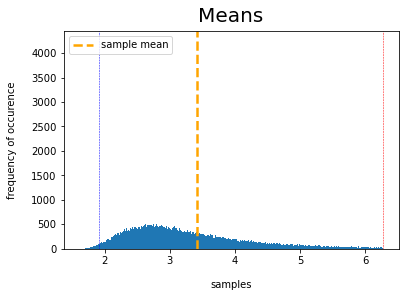

In [14]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()